<h1><center> Classification of Arrhythmia</center></h1>

Dataset used in this project is available on the UCI machine learning algorithm. 

* It can be found at the following address: https://archive.ics.uci.edu/ml/datasets/Arrhythmia. 

* It consists of 452 different examples spread over 16 classes. Of the 452 examples, 245 are of "normal" people. We also have 12 different types of arrhythmias. Among all these types of arrhythmias, the most representative are the "coronary artery disease" and "Rjgbt boundle branch block".

* We have 279 features, which include age, sex, weight, height of patients and related information from the electrocardiogram. We explicitly observe that the number of features is relatively high compared to the number of examples we are available.

# 1. Data wrangling

### Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import math as mt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer

### Data Reading


Starting with reading the data file and creating a dataframe for putting the output of all the models that we will be running. The purpose of doing this is it will be easy for us to compare the models.

In [2]:
#Reading csv file

df=pd.read_csv("data/arrhythmia.csv",header=None)

**I. looking at first five rows of dataset**

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


**II. Looking at Last five rows of dataset**

In [4]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


**III. Basic Description of dataframe**

In [5]:
#Dimension of dataset.

df.shape

(452, 280)

In [6]:
#concise summary of the dataframe.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


In [7]:
#descriptive statistics of dataframe.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,452.0,46.471239,16.466631,0.0,36.00,47.00,58.000,83.0
1,452.0,0.550885,0.497955,0.0,0.00,1.00,1.000,1.0
2,452.0,166.188053,37.170340,105.0,160.00,164.00,170.000,780.0
3,452.0,68.170354,16.590803,6.0,59.00,68.00,79.000,176.0
4,452.0,88.920354,15.364394,55.0,80.00,86.00,94.000,188.0
...,...,...,...,...,...,...,...,...
275,452.0,0.514823,0.347531,-0.8,0.40,0.50,0.700,2.4
276,452.0,1.222345,1.426052,-6.0,0.50,1.35,2.100,6.0
277,452.0,19.326106,13.503922,-44.2,11.45,18.10,25.825,88.8
278,452.0,29.473230,18.493927,-38.6,17.55,27.90,41.125,115.9


### Handling Missing Values

<br>
While going through the dataset we observed that out of 279 attributes, 5 Attributes have missing value in the form 
of '?'. The approach which we will following is, first replacing '?' with numpy NAN and then imputing the mean using Simple Imputer.

**Checking for null values in dataset**

In [8]:
#Counting total Number of null values

pd.isnull(df).sum().sum()

0

In [9]:
#Replacing ? with np.nan value-

df = df.replace('?', np.NaN)

In [10]:
#final counting total number of null values in dataset

nu=pd.isnull(df).sum().sum()
nu

408

**Visualizing  the distribution of our missing data:**

Text(0, 0.5, 'Total number of null value in each column')

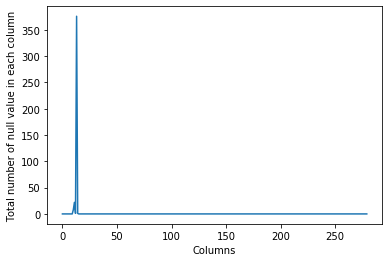

In [11]:
pd.isnull(df).sum().plot()
plt.xlabel('Columns')
plt.ylabel('Total number of null value in each column')

Text(0, 0.5, 'Total number of null value in each column')

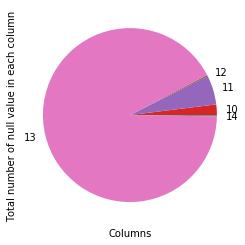

In [12]:
#Zooming in

pd.isnull(df).sum()[7:17].plot(kind="pie")
plt.xlabel('Columns')
plt.ylabel('Total number of null value in each column')

Text(0, 0.5, 'Total number of null value in each column')

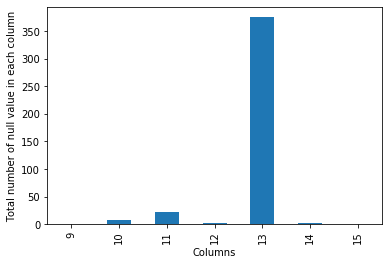

In [13]:
#visualizing the exact columns of missing values

pd.isnull(df).sum()[9:16].plot(kind="bar")
plt.xlabel('Columns')
plt.ylabel('Total number of null value in each column')

In [14]:
#Dropping the column 13 as it contains some many missing values.

df.drop(columns = 13, inplace=True)

**Using the mean strategy and missing_values type for imputation**

In [15]:
# make copy to avoid changing original data (when Imputing)

new_df = df.copy()

In [16]:
# make new columns indicating what will be imputed

cols_with_missing = (col for col in new_df.columns 
                                 if new_df[col].isnull().any())
for col in cols_with_missing:
    new_df[col] = new_df[col].isnull()

In [17]:
# Imputation

my_imputer = SimpleImputer()
new_df = pd.DataFrame(my_imputer.fit_transform(new_df))
new_df.columns = df.columns

In [18]:
# imputed dataframe

new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


In [19]:
# DataSet with Zero null Values.

pd.isnull(new_df).sum().sum()

0

**Generating final dataset**

In [20]:
#Creating column names

final_df_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","class"]

In [21]:
#Adding Column names to dataset

new_df.columns=final_df_columns
new_df.to_csv("new data with target class.csv")
new_df.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


In [22]:
# Removing target Attribute to Create a final dataframe.

final_df = new_df.drop(columns ="class")
final_df.to_csv("FInal Dataset with dropped class Attribute.csv")
final_df.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6270,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8


In [23]:
pd.isnull(final_df).sum().sum()

0

# 2. Exploratory Data Analysis (EDA)

**Making a list with all 16 Class Names.**

In [24]:
#List with class names

class_names = ["Normal", 
               "Ischemic changes (CAD)", 
               "Old Anterior Myocardial Infraction",
               "Old Inferior Myocardial Infraction",
               "Sinus tachycardy", 
               "Sinus bradycardy", 
               "Ventricular Premature Contraction (PVC)",
               "Supraventricular Premature Contraction",
               "Left Boundle branch block",
               "Right boundle branch block",
               "1.Degree AtrioVentricular block",
               "2.Degree AV block",
               "3.Degree AV block",
               "Left Ventricule hypertrophy",
               "Atrial Fibrillation or Flutter",
               "Others"]

### Analyze the dataset and check how many examples we have for each class:

In [25]:
# just checking for datatypes of attributes

final_df[["Age","Heart_Rate"]].dtypes

Age           float64
Heart_Rate    float64
dtype: object

we need to sort our dataset with respect to class attributes to count the number of instances available for each class

In [26]:
#sorting with respect to class attribute.

t=new_df.sort_values(by=["class"])

In [27]:
# Counting the number of instances for each class

la = t["class"].value_counts(sort=False).tolist()
la

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 4, 5, 22]

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 0, 0, 0, 4, 5, 22]


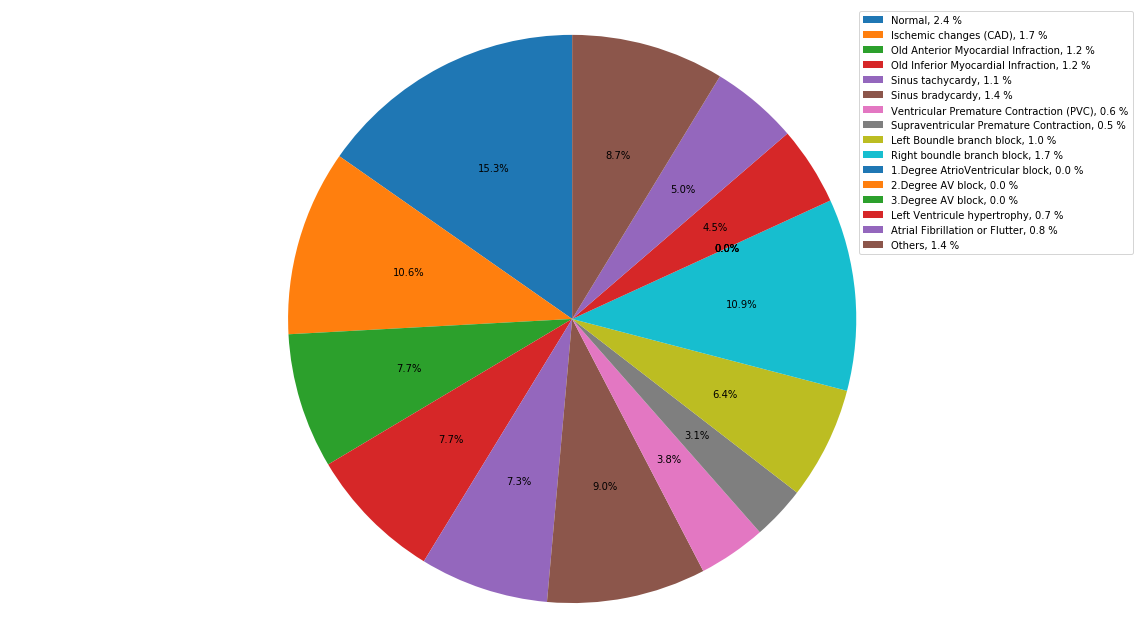

In [28]:
#Visualiation of Dataset With Respect to Class

labels = class_names
values = la[0:10]
values.extend([0,0,0])
values.extend(la[10:13])
print(values)
#we normalize the data with base 10 logarithm to be able to "plot them in a decent way"
Log_Norm = []
for i in values:
    Log_Norm.append(mt.log10(i+1))
fig1, ax1 = plt.subplots(figsize=(16,9))
patches = plt.pie(Log_Norm, autopct='%1.1f%%', startangle=90)

leg = plt.legend( loc = 'best', labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels, Log_Norm)])
plt.axis('equal')

for text in leg.get_texts():
    plt.setp(text, color = 'Black')
plt.tight_layout()
plt.show()

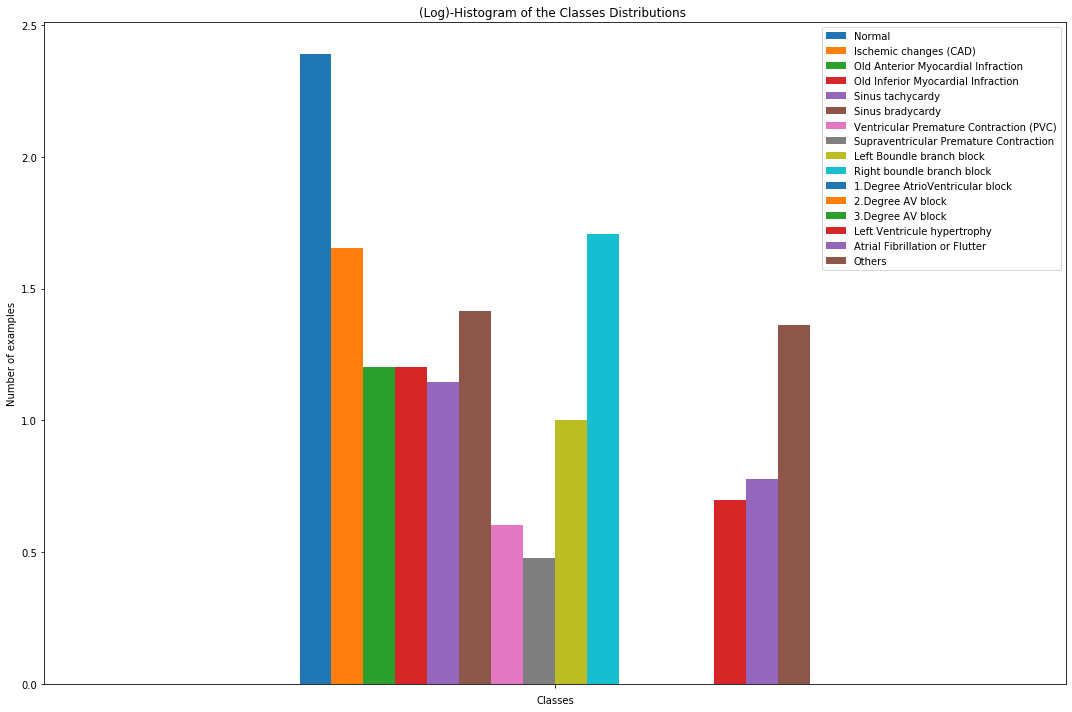

In [29]:
fdict = {}
j = 0
for i in labels:
    fdict[i] = Log_Norm[j]
    j+=1
fdf = pd.DataFrame(fdict,index=[0])
fdf = fdf.rename(index={0: ''})
fig, ax = plt.subplots(figsize=(15,10))
fdf.plot(kind="bar",ax=ax)
ax.set_title("(Log)-Histogram of the Classes Distributions ")
ax.set_ylabel('Number of examples')
ax.set_xlabel('Classes')
fig.tight_layout()
plt.show()

In [30]:
#grouped description

grouped_mean = new_df.groupby(["class"]).mean()
grouped_median = new_df.groupby(["class"]).median()
grouped_mode = new_df.groupby(["class"]).agg(lambda x: sp.stats.mode(x)[0])
gouped_std = new_df.groupby(['class']).std()

In [31]:
grouped_median.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6270,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279
class,,,,,,,,,,,,,,,,,,,,,
1.0,46.0,1.0,163.0,68.0,84.0,156.0,367.0,160.0,91.0,41.0,...,-0.1,0.0,9.1,-0.9,0.0,0.0,0.5,1.6,19.10,31.7
2.0,55.0,1.0,160.5,70.0,90.5,159.0,366.0,176.5,91.0,37.5,...,-0.8,0.0,9.6,-1.3,0.0,0.0,0.5,-0.8,20.05,11.8
3.0,50.0,0.0,170.0,74.0,93.0,163.0,351.0,196.0,96.0,48.0,...,-0.2,0.0,6.3,-2.0,0.0,0.0,0.8,0.6,12.30,19.3
4.0,57.0,0.0,165.0,76.0,93.0,157.0,357.0,161.0,95.0,-2.0,...,-0.2,-0.7,6.3,-0.5,0.0,0.0,0.7,0.3,10.90,12.0
5.0,34.0,1.0,160.0,51.0,82.0,155.0,302.0,153.0,81.0,52.0,...,-0.3,0.0,5.1,-2.1,0.0,0.0,0.5,0.9,6.00,10.7


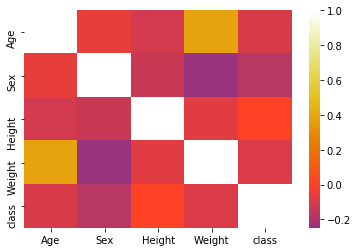

In [32]:
#co-relational heatmap

sns.heatmap(new_df[['Age', 'Sex', 'Height', 'Weight','class']].corr(), cmap='CMRmap',center=0)
plt.show()

### Handling Outliers & Data Visualization

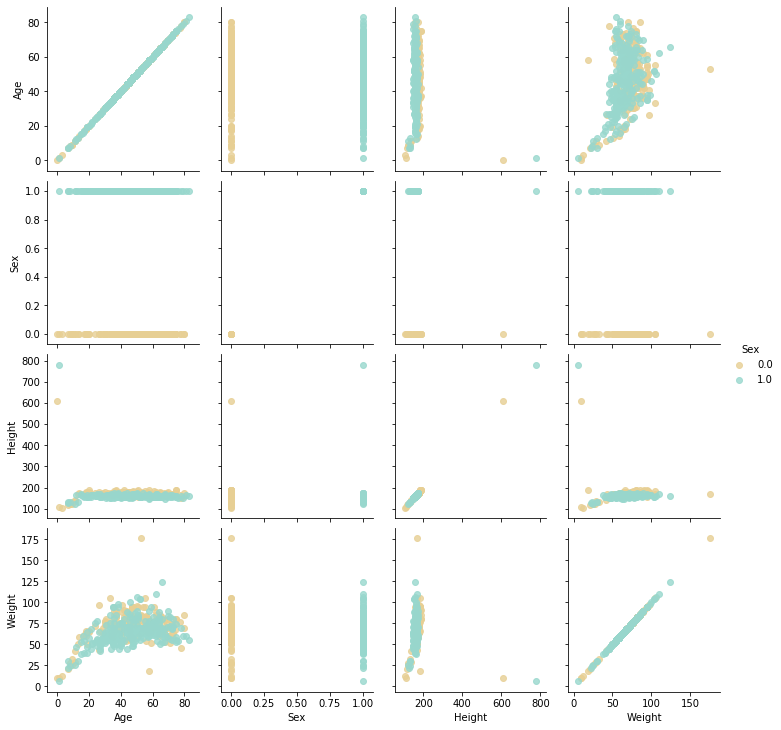

In [33]:
#looking for pairwise relationships and outliers

g = sns.PairGrid(final_df, vars=['Age', 'Sex', 'Height', 'Weight'],
                 hue='Sex', palette='BrBG')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

According to scatter plots, there are few outliers in 'height' and 'weight' attributes.check the maximums of heights and weights

In [34]:
sorted(final_df['Height'], reverse=True)[:10]

[780.0, 608.0, 190.0, 190.0, 190.0, 188.0, 186.0, 186.0, 186.0, 185.0]

The tallest person ever lived in the world was **272** cm (1940). His followers were **267** cm(1905) and **263.5** cm(1969). Replacing **780** and **608** with **180** and **108** cm respectively

In [35]:
final_df['Height']=final_df['Height'].replace(608,108)
final_df['Height']=final_df['Height'].replace(780,180)

In [36]:
sorted(final_df['Weight'], reverse=True)[:10]

[176.0, 124.0, 110.0, 106.0, 105.0, 105.0, 104.0, 104.0, 100.0, 98.0]

**176 kgs** is a possible weight. so we'll keep them in the dataframe.

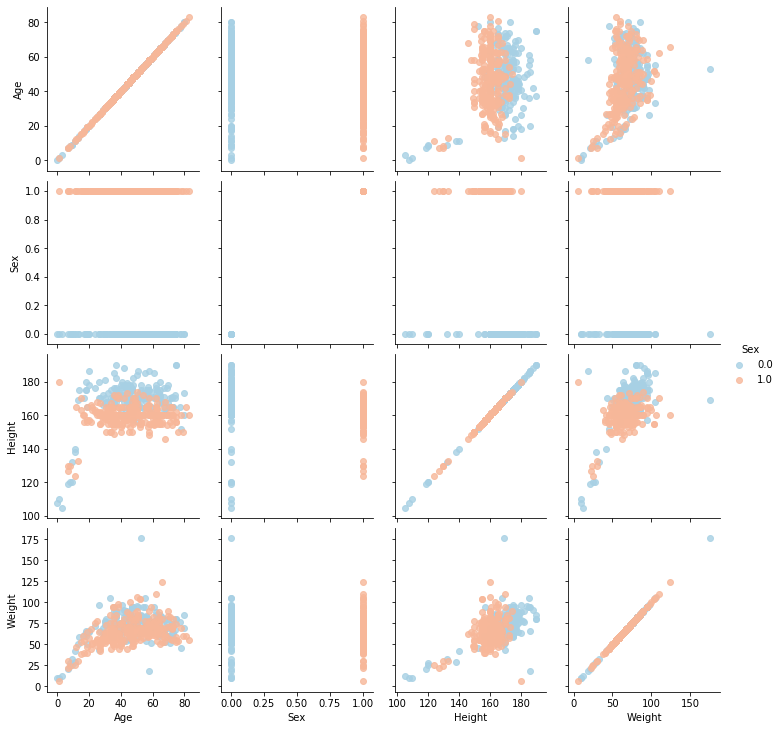

In [37]:
g = sns.PairGrid(final_df, vars=['Age', 'Sex', 'Height', 'Weight'],
                 hue='Sex', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

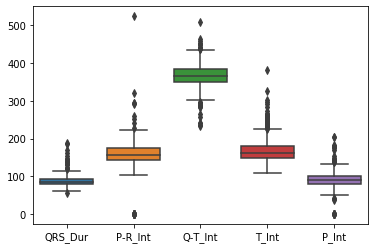

In [38]:
sns.boxplot(data=final_df[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]]);

PR interval is the period, measured in milliseconds, that extends from the beginning of the P wave until the beginning of the QRS complex; it is normally between 120 and 200ms in duration. 

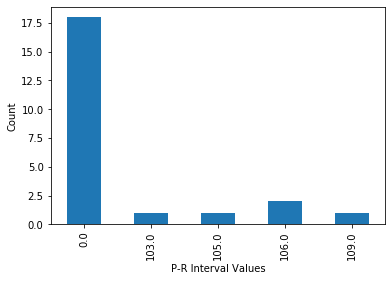

In [39]:
final_df['P-R_Int'].value_counts().sort_index().head().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

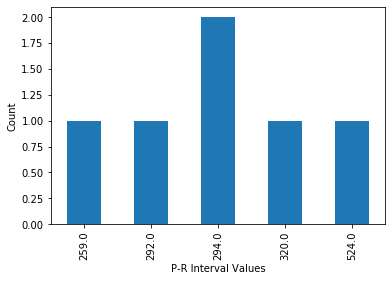

In [40]:
final_df['P-R_Int'].value_counts().sort_index().tail().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

#### PR Interval data is including outliers 0(x18). I'll keep them

QT interval is a measure of the time between the start of the Q wave and the end of the T wave in the heart's electrical cycle. The outlier data appearing in Q-T Interval box might be related to the outlier of T-interval data.

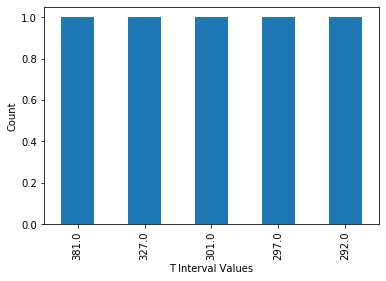

In [41]:
final_df['T_Int'].value_counts().sort_index(ascending=False).head().plot(kind='bar')
plt.xlabel('T Interval Values')
plt.ylabel('Count');

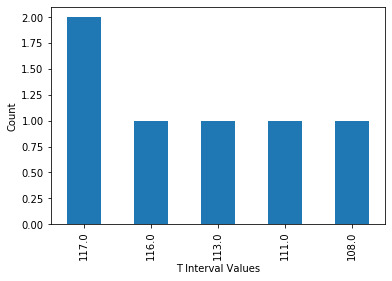

In [42]:
final_df['T_Int'].value_counts().sort_index(ascending=False).tail().plot(kind='bar')
plt.xlabel('T Interval Values')
plt.ylabel('Count');

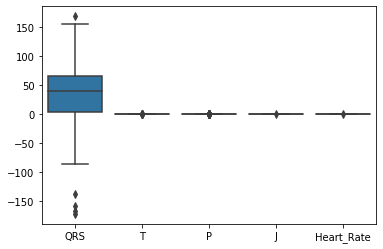

In [43]:
sns.boxplot(data=final_df[["QRS","T","P","J","Heart_Rate"]]);

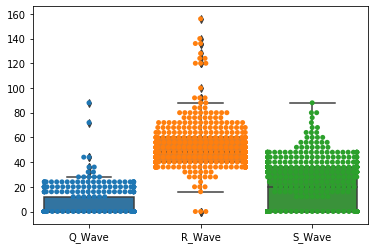

In [44]:
sns.boxplot(data=final_df[["Q_Wave","R_Wave","S_Wave"]])
sns.swarmplot(data=final_df[["Q_Wave","R_Wave","S_Wave"]]);

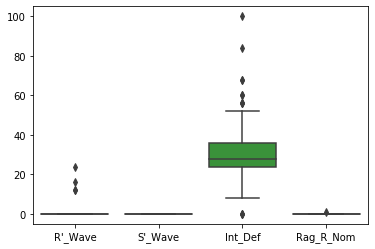

In [45]:
sns.boxplot(data=final_df[["R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]]);
#sns.swarmplot(data=final_df[["R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]])

#### S'Wave has 0's which is not a NaN. So, we can't assume it as including outliers.

In [46]:
final_df["R'_Wave"].value_counts().sort_index(ascending=False)

24.0      1
16.0      1
12.0      2
0.0     448
Name: R'_Wave, dtype: int64

In [47]:
final_df["S'_Wave"].value_counts().sort_index(ascending=False)

0.0    452
Name: S'_Wave, dtype: int64

In [48]:
final_df["Rag_R_Nom"].value_counts().sort_index(ascending=False)

1.0      1
0.0    451
Name: Rag_R_Nom, dtype: int64

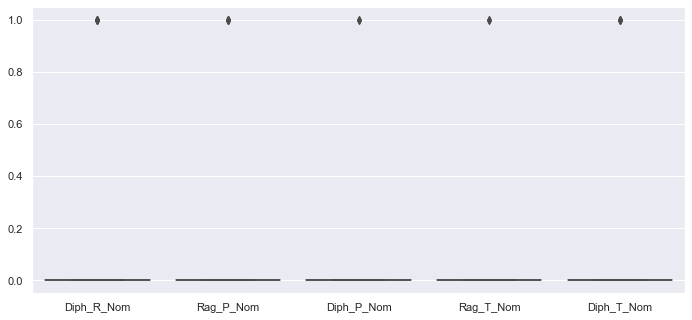

In [49]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom"]]);

In [50]:
final_df["Diph_R_Nom"].value_counts().sort_index(ascending=False)

1.0      5
0.0    447
Name: Diph_R_Nom, dtype: int64

In [51]:
final_df["Rag_P_Nom"].value_counts().sort_index(ascending=False)

1.0      5
0.0    447
Name: Rag_P_Nom, dtype: int64

In [52]:
final_df["Diph_P_Nom"].value_counts().sort_index(ascending=False)

1.0      2
0.0    450
Name: Diph_P_Nom, dtype: int64

In [53]:
final_df["Rag_T_Nom"].value_counts().sort_index(ascending=False)

1.0      2
0.0    450
Name: Rag_T_Nom, dtype: int64

In [54]:
final_df["Diph_T_Nom"].value_counts().sort_index(ascending=False)

1.0      4
0.0    448
Name: Diph_T_Nom, dtype: int64

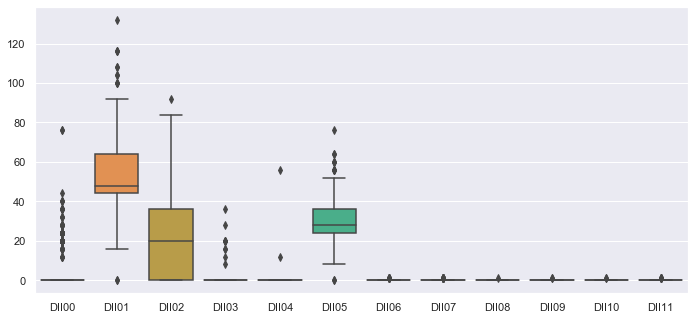

In [55]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11"]]);

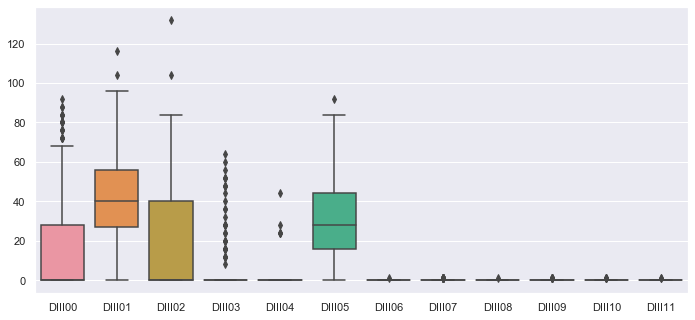

In [56]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06",
                       "DIII07","DIII08","DIII09","DIII10","DIII11"]]);

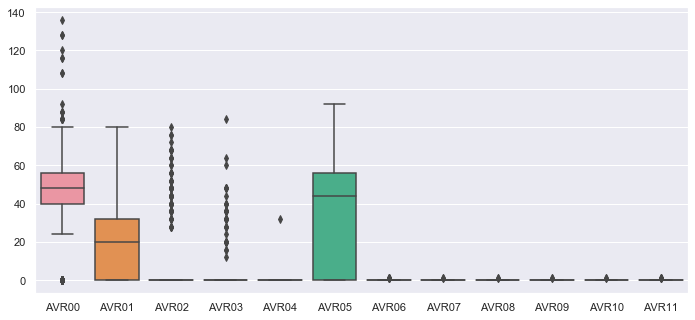

In [57]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVR00","AVR01","AVR02","AVR03","AVR04","AVR05",
                       "AVR06","AVR07","AVR08","AVR09","AVR10","AVR11"]]);

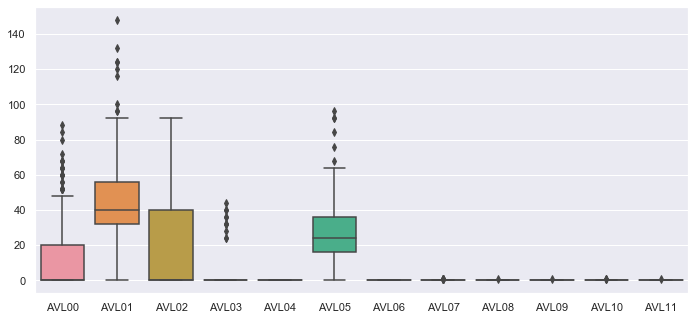

In [58]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11"]]);

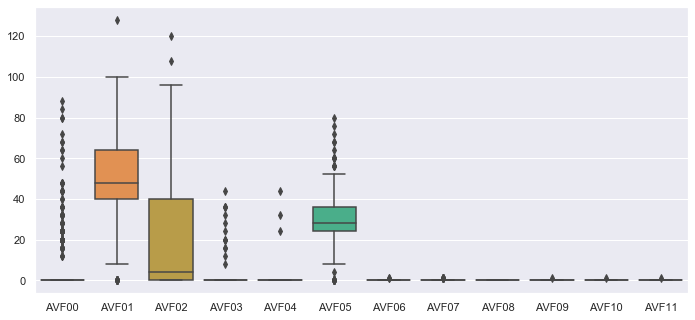

In [59]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11"]]);

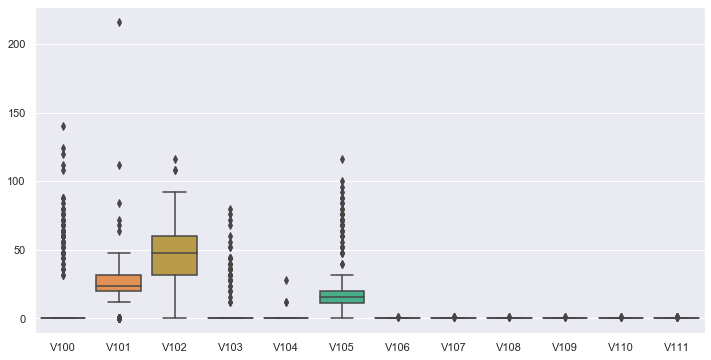

In [60]:
sns.set(rc={'figure.figsize':(12,6)})
sns.boxplot(data=final_df[["V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111"]]);

In [61]:
final_df["V101"].value_counts().sort_index(ascending=False)

216.0     1
112.0     1
84.0      1
72.0      1
68.0      1
64.0      1
48.0      6
44.0      6
40.0     13
36.0     36
32.0     63
28.0     81
24.0     88
20.0     57
16.0     13
12.0      4
0.0      79
Name: V101, dtype: int64

**V101** has an outlier, but when we look at other sets (V201, V301, V501) we can see that there's an outlier similarly. Since our data is heavily biased, I can't say these outliers should be dropped. 

For example, when we look at our data, we can see that class # 8 (Supraventricular Premature Contraction) **has only 2 instances**. Or # 3 (Ventricular Premature Contraction (PVC)) has only 3. The outliers appearing with our plots might belong to these instances and needs to be kept.

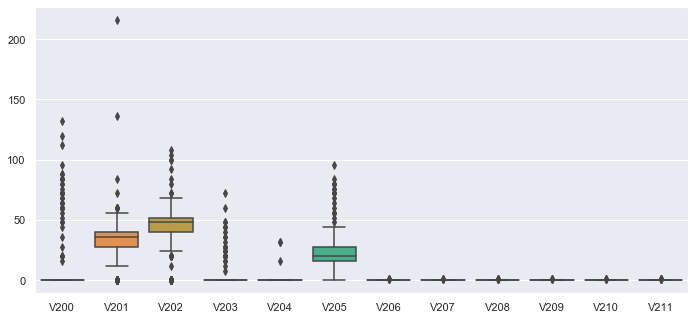

In [62]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211"]]);

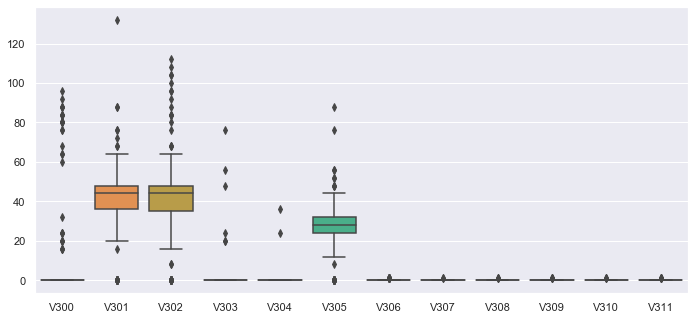

In [63]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311"]]);

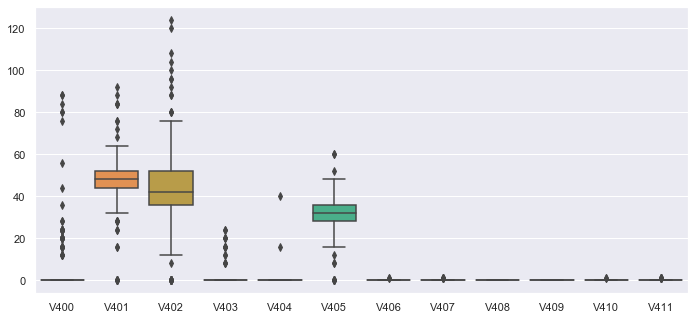

In [64]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411"]]);

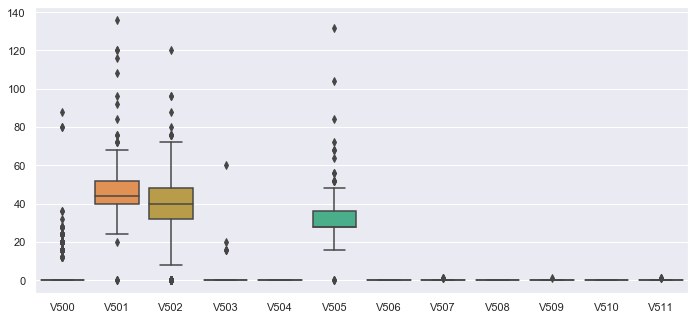

In [65]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511"]]);

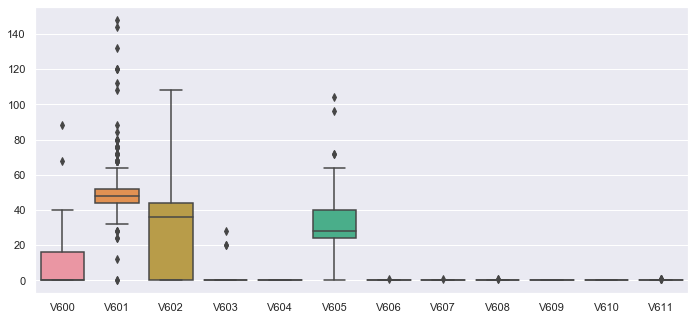

In [66]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611"]]);

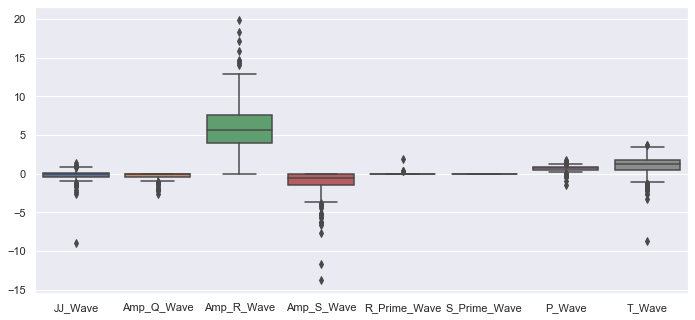

In [67]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave"]]);

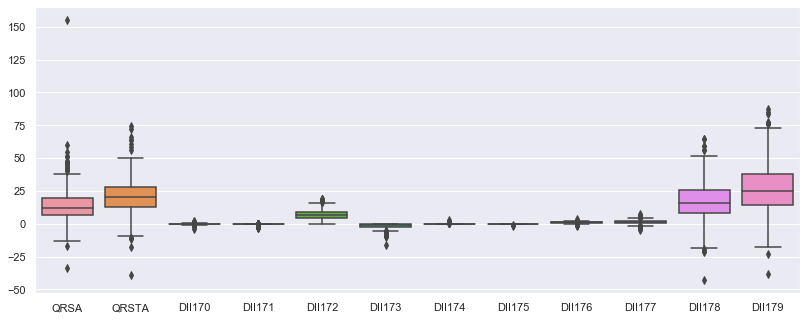

In [68]:
sns.set(rc={'figure.figsize':(13.7,5.27)})
sns.boxplot(data=final_df[["QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179"]]);

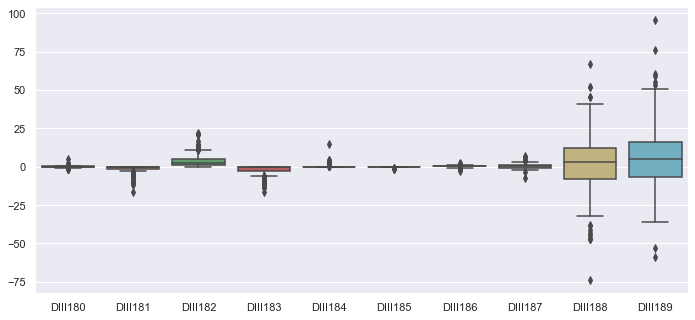

In [69]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189"]]);

Now we can see outlier within the last two attributes of each series(DIII188, DIII189, AVR198, AVR199, AVL208, AVL209, AVF218, AVF219, V2238, V2239, V3248, V3249,V4258, V4259,V5268, V5269, V6278, V6279). Similiarly assuming that these outliers might belong to the classes with few instances.

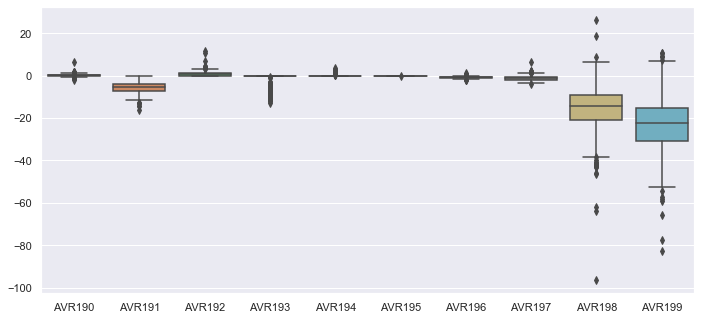

In [70]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199"]]);

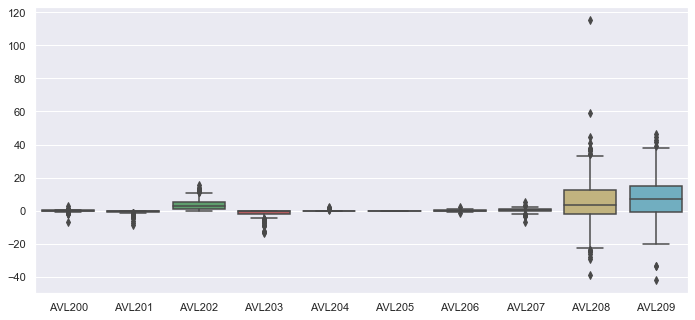

In [71]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209"]]);

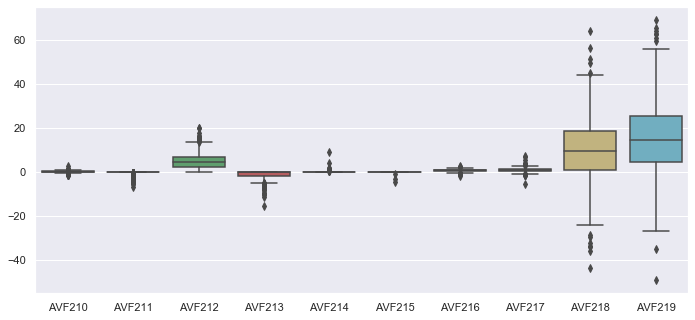

In [72]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219"]]);

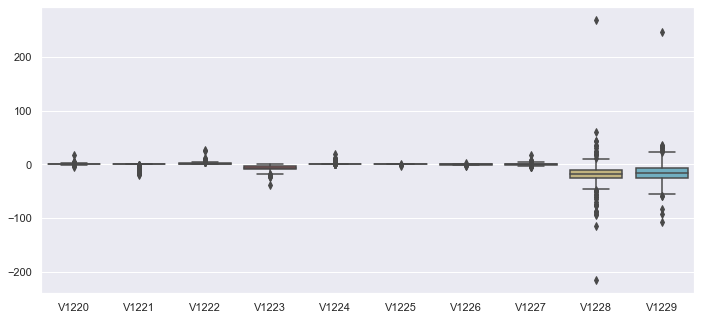

In [73]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229"]]);

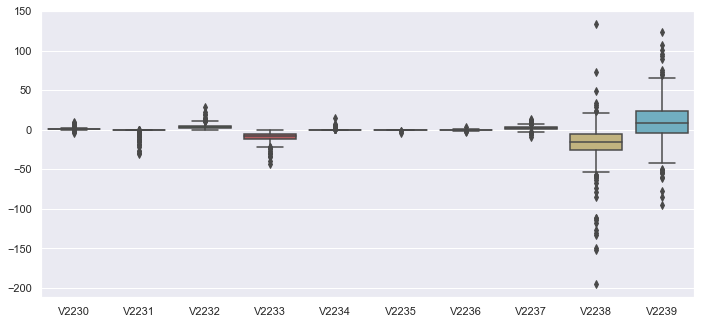

In [74]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239"]]);

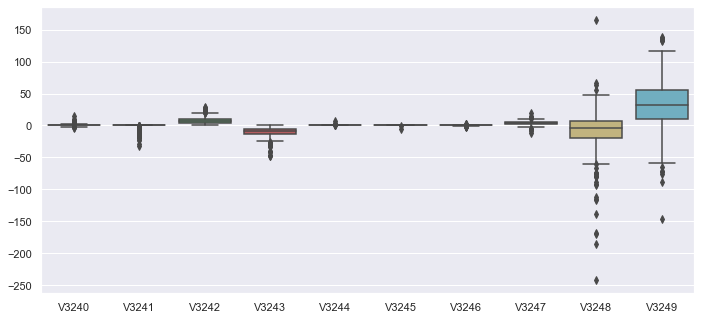

In [75]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249"]]);

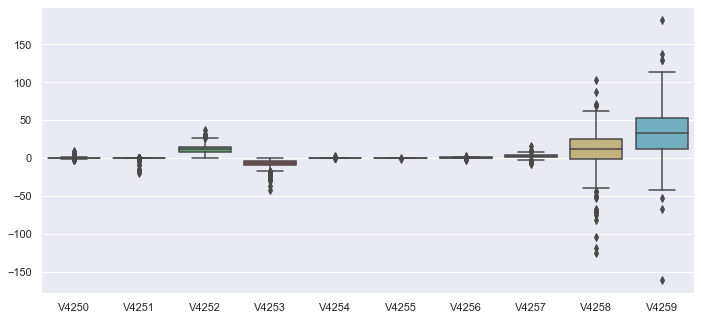

In [76]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259"]]);

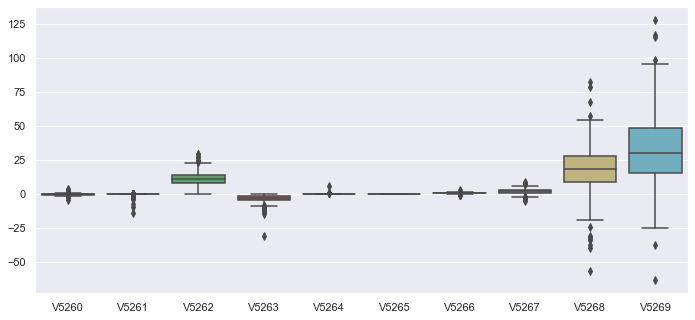

In [77]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269"]]);

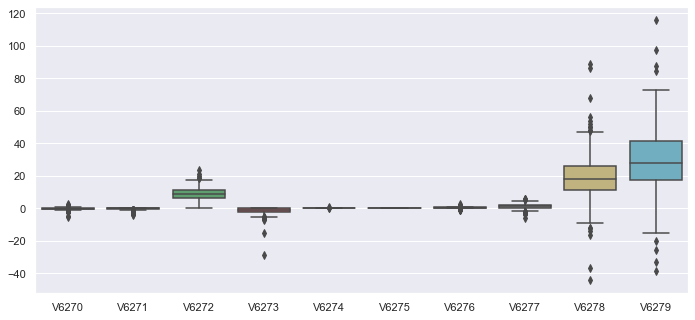

In [78]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279"]]);

### How Physical Condition affects persons health

#### Understanding whether people's age affects their  condition

In [79]:
class_list = []
j = 1
new_class_names =[]
for i in class_names:
   
    if(i != "1.Degree AtrioVentricular block" and i!= '3.Degree AV block' and i!= "2.Degree AV block"  ):
        class_list.append([j,i,grouped_mean["Age"][j],grouped_median["Age"][j],grouped_mode["Age"][j],gouped_std["Age"][j]])
        new_class_names.append(i)
    j+=1
AgeClass = {
    "AgeAVG": grouped_mean["Age"],"AgeMdian":grouped_median["Age"],
            "AgeMode": grouped_mode["Age"],"AgeStd":gouped_std['Age'],"Class":new_class_names }
AgeClassDF =pd.DataFrame(AgeClass)

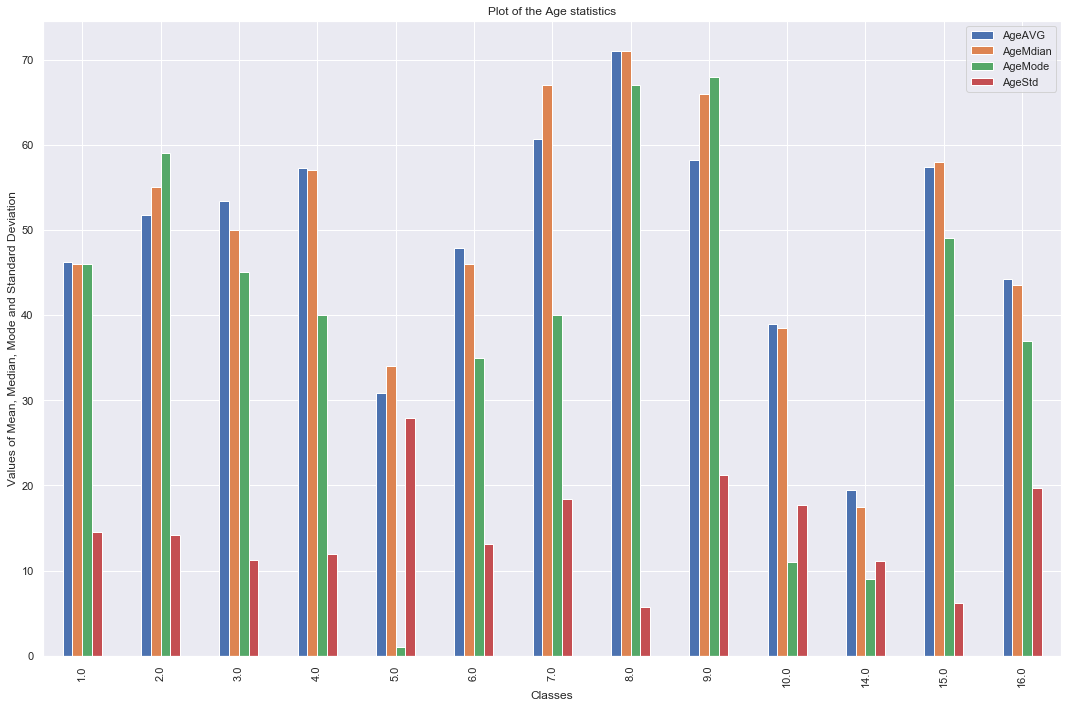

,AgeAVG,AgeMdian,AgeMode,AgeStd,Class
class,,,,,
1.0,46.273469,46.0,46.0,14.556092,Normal
2.0,51.750000,55.0,59.0,14.160418,Ischemic changes (CAD)
3.0,53.333333,50.0,45.0,11.286317,Old Anterior Myocardial Infraction
4.0,57.266667,57.0,40.0,11.895177,Old Inferior Myocardial Infraction
5.0,30.846154,34.0,1.0,27.904140,Sinus tachycardy
6.0,47.920000,46.0,35.0,13.165359,Sinus bradycardy
7.0,60.666667,67.0,40.0,18.339393,Ventricular Premature Contraction (PVC)
8.0,71.000000,71.0,67.0,5.656854,Supraventricular Premature Contraction
9.0,58.222222,66.0,68.0,21.211894,Left Boundle branch block


In [80]:
fig, ax = plt.subplots(figsize=(15,10))
AgeClassDF.plot(kind="bar",ax=ax)
ax.set_title("Plot of the Age statistics")
ax.set_ylabel('Values of Mean, Median, Mode and Standard Deviation')
ax.set_xlabel('Classes')
fig.tight_layout()
plt.show()
AgeClassDF

#### understanding whether people's gender affects their condition

<br>
basic statistics of males and females

In [81]:
 class_list = []
j = 1
new_class_names =[]
for i in class_names:
   
    if(i != "1.Degree AtrioVentricular block" and i!= '3.Degree AV block' and i!= "2.Degree AV block"  ):
        class_list.append([j,i,grouped_mean["Sex"][j],grouped_median["Sex"][j],grouped_mode["Sex"][j],gouped_std["Sex"][j]])
        new_class_names.append(i)
    j+=1
SexClass = {
    "SexAVG": grouped_mean["Sex"],"SexMdian":grouped_median["Sex"],
            "SexMode": grouped_mode["Sex"],"SexStd":gouped_std['Sex'],"Class":new_class_names }
SexClassDF =pd.DataFrame(SexClass)

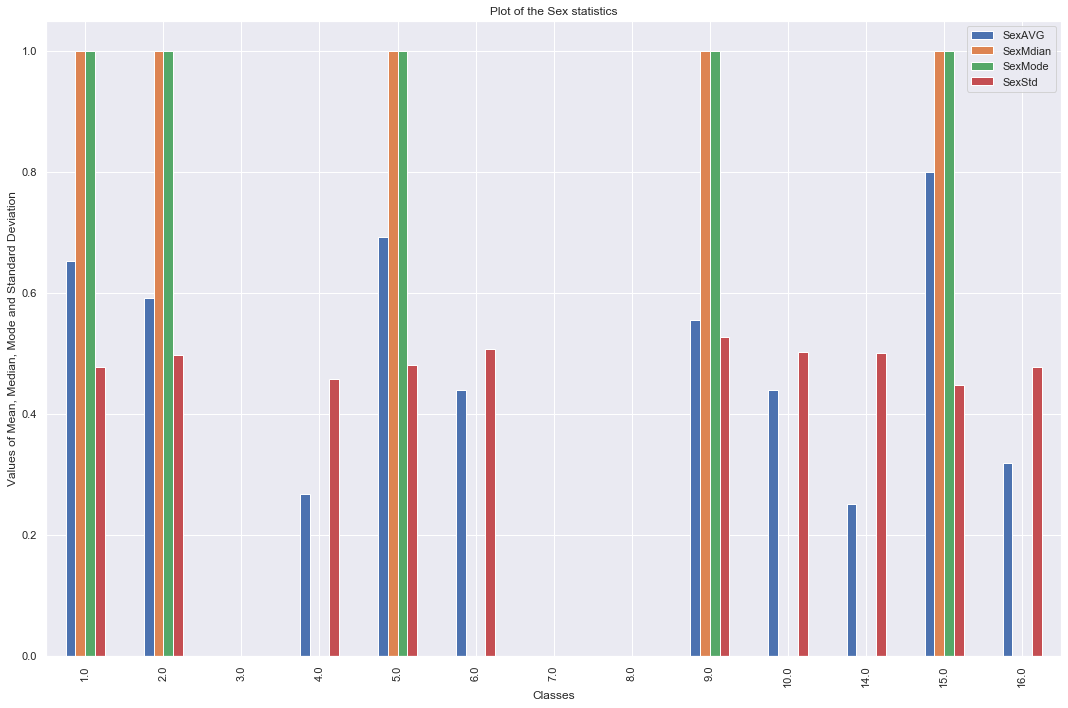

,SexAVG,SexMdian,SexMode,SexStd,Class
class,,,,,
1.0,0.653061,1.0,1.0,0.476970,Normal
2.0,0.590909,1.0,1.0,0.497350,Ischemic changes (CAD)
3.0,0.000000,0.0,0.0,0.000000,Old Anterior Myocardial Infraction
4.0,0.266667,0.0,0.0,0.457738,Old Inferior Myocardial Infraction
5.0,0.692308,1.0,1.0,0.480384,Sinus tachycardy
6.0,0.440000,0.0,0.0,0.506623,Sinus bradycardy
7.0,0.000000,0.0,0.0,0.000000,Ventricular Premature Contraction (PVC)
8.0,0.000000,0.0,0.0,0.000000,Supraventricular Premature Contraction
9.0,0.555556,1.0,1.0,0.527046,Left Boundle branch block


In [82]:
fig, ax = plt.subplots(figsize=(15,10))
SexClassDF.plot(kind="bar",ax=ax)
ax.set_title("Plot of the Sex statistics")
ax.set_ylabel('Values of Mean, Median, Mode and Standard Deviation')
ax.set_xlabel('Classes')
fig.tight_layout()
plt.show()
SexClassDF

####  Understanding whether or not the patient's weight affects the patient's condition

In [83]:
class_list = []
j = 1
new_class_names =[]
for i in class_names:
   
    if(i != "1.Degree AtrioVentricular block" and i!= '3.Degree AV block' and i!= "2.Degree AV block"  ):
        class_list.append([j,i,grouped_mean["Weight"][j],grouped_median["Weight"][j],grouped_mode["Weight"][j],gouped_std["Weight"][j]])
        new_class_names.append(i)
    j+=1
WeightClass = {
    "WeightAVG": grouped_mean["Weight"],"WeightMdian":grouped_median["Weight"],
            "WeightMode": grouped_mode["Weight"],"WeightStd":gouped_std['Weight'],"Class":new_class_names }
WeightClassDF =pd.DataFrame(WeightClass)

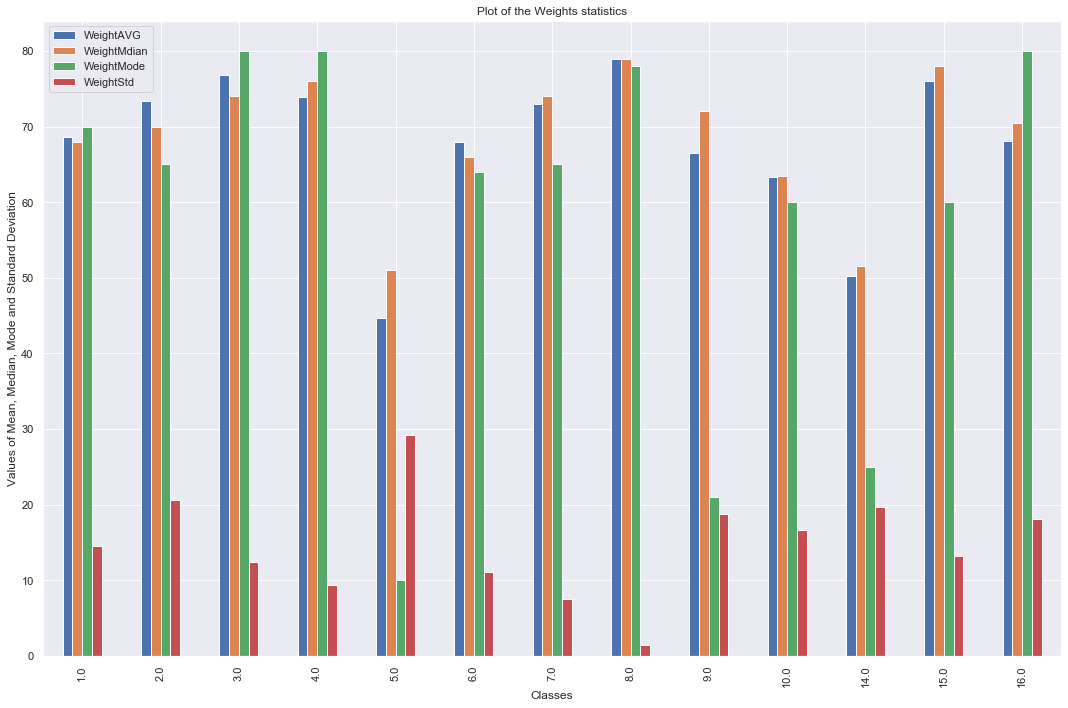

,WeightAVG,WeightMdian,WeightMode,WeightStd,Class
class,,,,,
1.0,68.669388,68.0,70.0,14.454595,Normal
2.0,73.363636,70.0,65.0,20.617323,Ischemic changes (CAD)
3.0,76.866667,74.0,80.0,12.397388,Old Anterior Myocardial Infraction
4.0,73.866667,76.0,80.0,9.318696,Old Inferior Myocardial Infraction
5.0,44.615385,51.0,10.0,29.259011,Sinus tachycardy
6.0,68.000000,66.0,64.0,11.045361,Sinus bradycardy
7.0,73.000000,74.0,65.0,7.549834,Ventricular Premature Contraction (PVC)
8.0,79.000000,79.0,78.0,1.414214,Supraventricular Premature Contraction
9.0,66.444444,72.0,21.0,18.808981,Left Boundle branch block


In [84]:
fig, ax = plt.subplots(figsize=(15,10))
WeightClassDF.plot(kind="bar",ax=ax)
ax.set_title("Plot of the Weights statistics")
ax.set_ylabel('Values of Mean, Median, Mode and Standard Deviation')
ax.set_xlabel('Classes')
fig.tight_layout()
plt.show()
WeightClassDF



#### Understanding whether people's height affects their condition

In [85]:
class_list = []
j = 1
new_class_names =[]
for i in class_names:
   
    if(i != "1.Degree AtrioVentricular block" and i!= '3.Degree AV block' and i!= "2.Degree AV block"  ):
        class_list.append([j,i,grouped_mean["Height"][j],grouped_median["Height"][j],grouped_mode["Height"][j],gouped_std["Height"][j]])
        new_class_names.append(i)
    j+=1
HeightClass = {
    "HeightAVG": grouped_mean["Height"],"HeightMdian":grouped_median["Height"],
            "HeightMode": grouped_mode["Height"],"HeightStd":gouped_std['Height'],"Class":new_class_names }
HeightClassDF =pd.DataFrame(HeightClass)

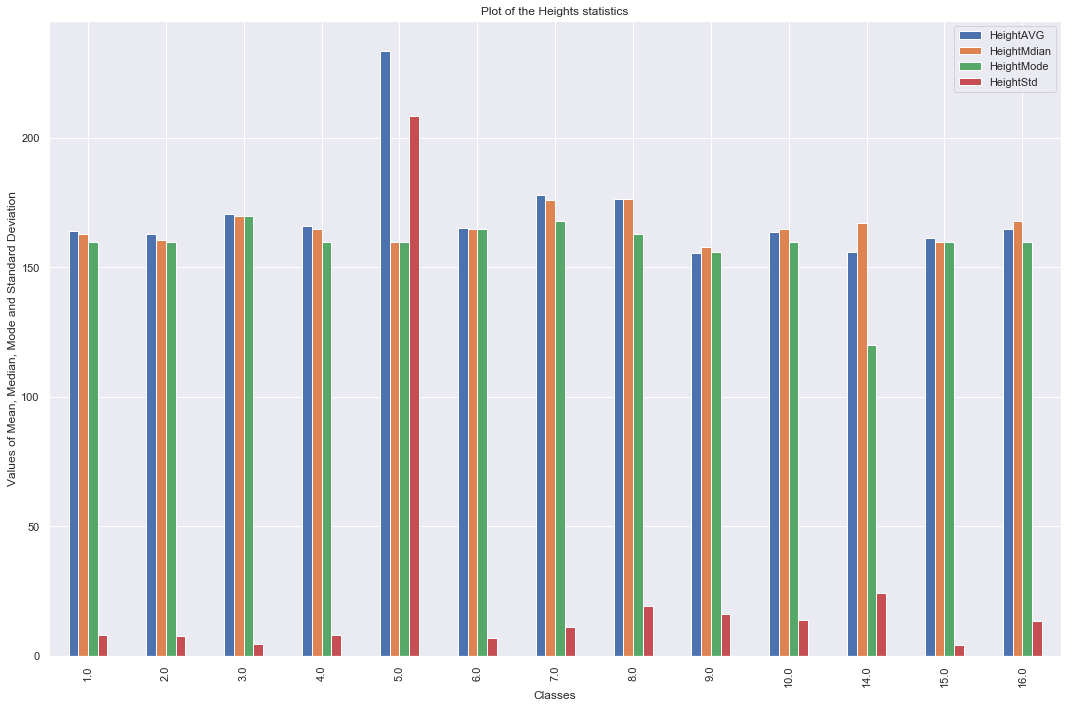

,HeightAVG,HeightMdian,HeightMode,HeightStd,Class
class,,,,,
1.0,164.102041,163.0,160.0,8.048126,Normal
2.0,163.068182,160.5,160.0,7.456534,Ischemic changes (CAD)
3.0,170.600000,170.0,170.0,4.579457,Old Anterior Myocardial Infraction
4.0,166.000000,165.0,160.0,7.973169,Old Inferior Myocardial Infraction
5.0,233.615385,160.0,160.0,208.500015,Sinus tachycardy
6.0,165.040000,165.0,165.0,6.996904,Sinus bradycardy
7.0,178.000000,176.0,168.0,11.135529,Ventricular Premature Contraction (PVC)
8.0,176.500000,176.5,163.0,19.091883,Supraventricular Premature Contraction
9.0,155.666667,158.0,156.0,16.209565,Left Boundle branch block


In [86]:
fig, ax = plt.subplots(figsize=(15,10))
HeightClassDF.plot(kind="bar",ax=ax)
ax.set_title("Plot of the Heights statistics")
ax.set_ylabel('Values of Mean, Median, Mode and Standard Deviation')
ax.set_xlabel('Classes')
fig.tight_layout()
plt.show()
HeightClassDF



#### Understanding whether QRS Duration affects people condition

In [87]:
class_list = []
j = 1
new_class_names =[]
for i in class_names:
   
    if(i != "1.Degree AtrioVentricular block" and i!= '3.Degree AV block' and i!= "2.Degree AV block"  ):
        class_list.append([j,i,grouped_mean["QRS_Dur"][j],grouped_median["QRS_Dur"][j],grouped_mode["QRS_Dur"][j],gouped_std["QRS_Dur"][j]])
        new_class_names.append(i)
    j+=1
QRSTClass = {
    "QRSDAVG": grouped_mean["QRS_Dur"],"QRSDMdian":grouped_median["QRS_Dur"],
            "QRSDMode": grouped_mode["QRS_Dur"],"QRSDStd":gouped_std['QRS_Dur'],"Class":new_class_names }
QRSTClassDF =pd.DataFrame(QRSTClass)

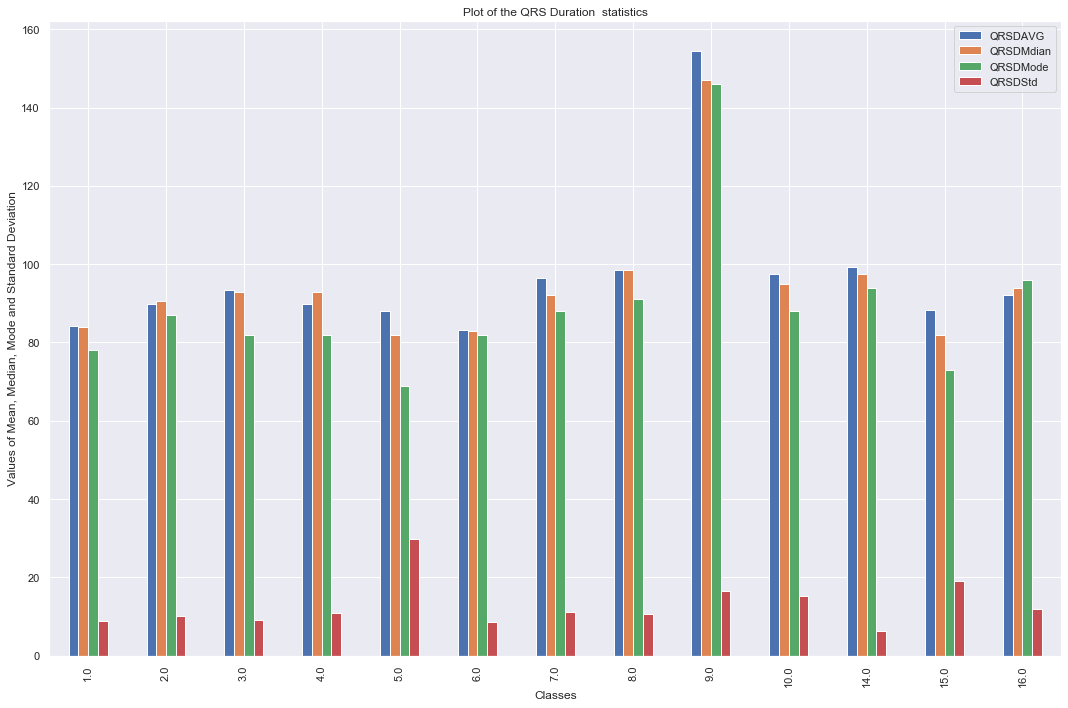

,QRSDAVG,QRSDMdian,QRSDMode,QRSDStd,Class
class,,,,,
1.0,84.277551,84.0,78.0,8.735439,Normal
2.0,89.818182,90.5,87.0,10.207778,Ischemic changes (CAD)
3.0,93.333333,93.0,82.0,9.131317,Old Anterior Myocardial Infraction
4.0,89.866667,93.0,82.0,10.979635,Old Inferior Myocardial Infraction
5.0,88.000000,82.0,69.0,29.796532,Sinus tachycardy
6.0,83.160000,83.0,82.0,8.561931,Sinus bradycardy
7.0,96.333333,92.0,88.0,11.150486,Ventricular Premature Contraction (PVC)
8.0,98.500000,98.5,91.0,10.606602,Supraventricular Premature Contraction
9.0,154.444444,147.0,146.0,16.409685,Left Boundle branch block


In [88]:
fig, ax = plt.subplots(figsize=(15,10))
QRSTClassDF.plot(kind="bar",ax=ax)
ax.set_title("Plot of the QRS Duration  statistics")
ax.set_ylabel('Values of Mean, Median, Mode and Standard Deviation')
ax.set_xlabel('Classes')
fig.tight_layout()
plt.show()
QRSTClassDF

## Distribution plotting

<br>
<br>

**We study the distributions and joint distributions of the features analyzed above**

<br>
We perform the fitting of the feature distributions with empirical distributions

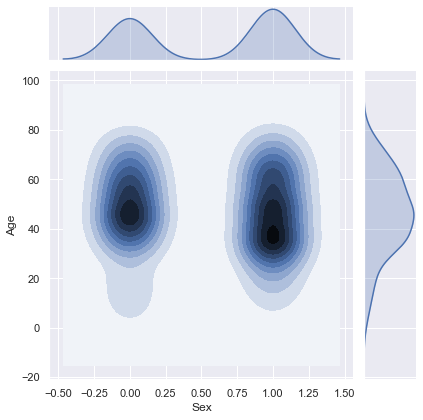

In [89]:
sns.jointplot("Sex", "Age", data=final_df, kind='kde') 

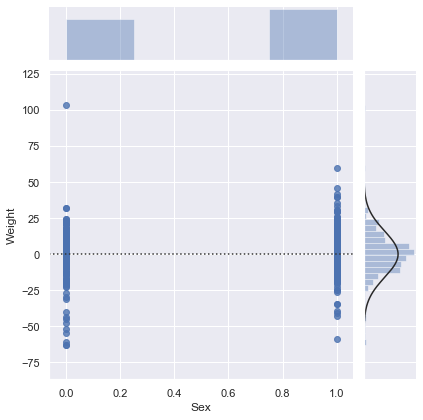

In [90]:
sns.jointplot("Sex", "Weight", data=final_df, kind='resid')

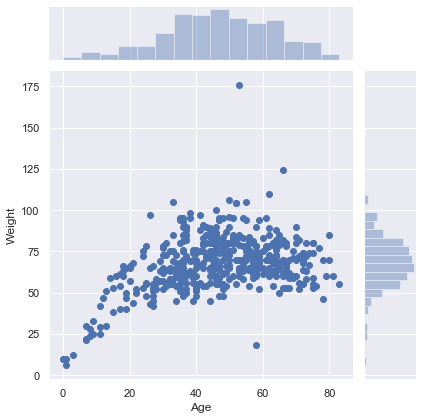

In [91]:
sns.jointplot("Age", "Weight", data=final_df, kind='scatter')

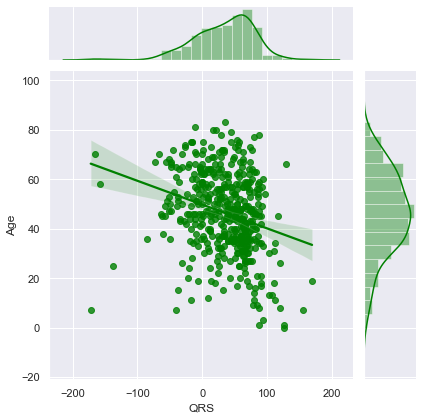

In [92]:
sns.jointplot("QRS", "Age", data=final_df, kind='reg',color="green") 

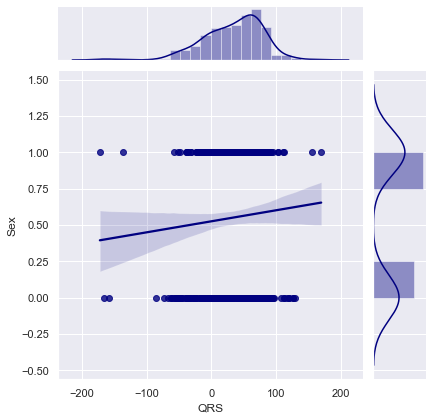

In [93]:
sns.jointplot("QRS", "Sex", data=final_df, kind='reg',color="navy") 

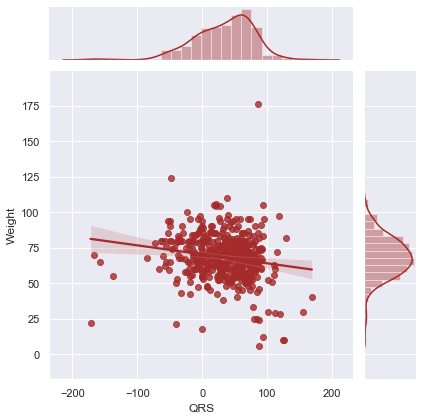

In [94]:
sns.jointplot("QRS", "Weight", data=final_df, kind='reg',color="brown") 

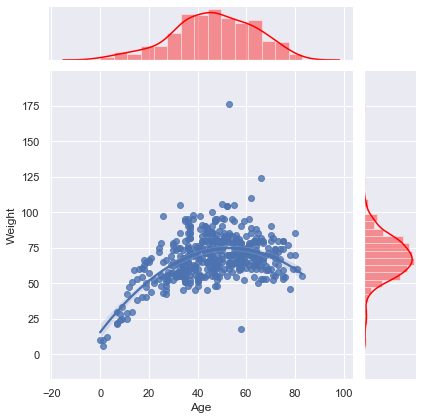

In [95]:
g = sns.JointGrid(x="Age", y="Weight", data=final_df) 
g.plot_joint(sns.regplot, order=2) 
g.plot_marginals(sns.distplot,color="red")

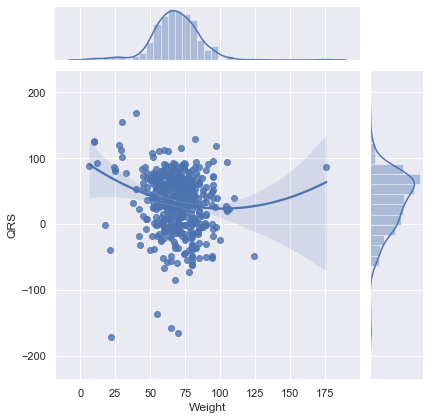

In [96]:
g = sns.JointGrid(x="Weight", y="QRS", data=final_df) 
g.plot_joint(sns.regplot, order=2) 
g.plot_marginals(sns.distplot)

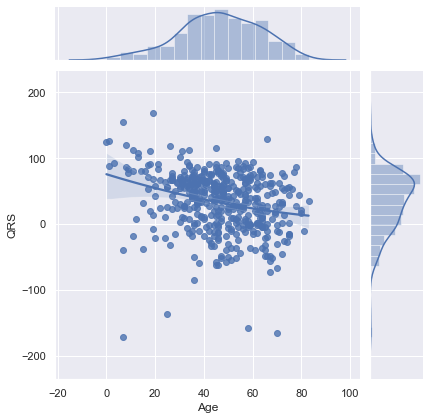

In [97]:
g = sns.JointGrid(x="Age", y="QRS", data=final_df) 
g.plot_joint(sns.regplot, order=2) 
g.plot_marginals(sns.distplot)

## Feature Scaling and Normalization